# Sprint 13 Tasca 2. Base de dades MySQL

## Nivell 1

## Exercici 1. Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="123123123",
  database="IT_Academy"
)

print(mydb)

## Nivell 2

## Exercici 2. Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

#### Seleccionem el nom dels hotels

In [48]:
select_hotels = "SELECT * \
FROM d_hotel"
with mydb.cursor() as cursor:
    cursor.execute(select_hotels)
    result = cursor.fetchall()
    df_1 = []
    for row in result:
        df_1.append(row)

In [51]:
pd.DataFrame(df_1, columns=['id_hotel', 'nom'])

,id_hotel,nom
0,1,Hotel Playa
1,2,Hotel Marea
2,3,Hotel Sol
3,4,Hotel Oceano
4,5,Hotel Atlantis
5,6,Hotel Calor


#### Seleccionem els 10 primers registres de la taula de reserves

In [53]:
select_10_results = "SELECT * \
FROM h_reserva \
LIMIT 10"
with mydb.cursor() as cursor:
    cursor.execute(select_10_results)
    result = cursor.fetchall()
    df_2 = []
    for row in result:
        df_2.append(row)

In [56]:
pd.DataFrame(df_2, columns=['id_reserva', 'id_hotel', 'id_tipo_habitacion','id_regimen','id_pais','desc_tipo_cliente','desc_canal','fecha_venta',
                                 'fecha_entrada','fecha_salida','fecha_cancelacion','importe','habitaciones','adultos','menores','cunas'])

,id_reserva,id_hotel,id_tipo_habitacion,id_regimen,id_pais,desc_tipo_cliente,desc_canal,fecha_venta,fecha_entrada,fecha_salida,fecha_cancelacion,importe,habitaciones,adultos,menores,cunas
0,1,1,DBSUPVML,AI,GBR,VACACIONAL,TTOO,2018-07-06,2018-08-12,2018-08-19,None,0.0000,0,0,0,0
1,2,1,DBVML,AI,None,VACACIONAL,TTOO,2018-07-06,2018-08-13,2018-08-20,None,0.0000,7,28,0,0
2,3,1,DBVML,AI,None,VACACIONAL,TTOO,2018-07-06,2018-08-13,2018-08-20,None,1564.4538,0,0,0,0
3,4,1,DBVML,AI,None,VACACIONAL,TTOO,2018-07-06,2018-08-13,2018-08-20,None,0.0000,0,0,0,0
4,5,1,DBVML,AI,None,VACACIONAL,TTOO,2018-07-06,2018-08-13,2018-08-20,None,38.2824,0,0,0,0
5,6,1,DBVML,AI,None,VACACIONAL,TTOO,2018-07-06,2018-08-13,2018-08-20,None,1.8135,0,0,0,0
6,7,1,DBVML,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-19,None,0.0000,5,20,0,0
7,8,1,DBVML,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-19,None,772.9020,0,0,0,0
8,9,1,DBVML,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-19,None,0.0000,0,0,0,0
9,10,1,DBVML,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-19,None,65.9529,0,0,0,0


#### Seleccionem la info que ens interesa de la taula de reserves i de la taula d'hotels i ho extreiem en un sol df

In [59]:
select_notnull_results = "SELECT * \
FROM h_reserva \
LEFT JOIN d_hotel \
ON d_hotel.id_hotel = h_reserva.id_hotel \
WHERE id_pais IS NOT NULL \
AND id_tipo_habitacion IS NOT NULL \
AND fecha_entrada >= 2018-08-01 \
AND importe > 0.0"
with mydb.cursor() as cursor:
    cursor.execute(select_notnull_results)
    result = cursor.fetchall()
    df_3 = []
    for row in result:
        df_3.append(row)

In [65]:
data = pd.DataFrame(df_3, columns=['id_reserva', 'id_hotel', 'id_tipo_habitacion','id_regimen','id_pais','desc_tipo_cliente','desc_canal','fecha_venta',
                                 'fecha_entrada','fecha_salida','fecha_cancelacion','importe','habitaciones','adultos','menores','cunas','id_hotel_2','nom_hotel'])

In [66]:
data

,id_reserva,id_hotel,id_tipo_habitacion,id_regimen,id_pais,desc_tipo_cliente,desc_canal,fecha_venta,fecha_entrada,fecha_salida,fecha_cancelacion,importe,habitaciones,adultos,menores,cunas,id_hotel_2,nom_hotel
0,8,1,DBVML,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-19,None,772.902000,0,0,0,0,1,Hotel Playa
1,10,1,DBVML,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-19,None,65.952900,0,0,0,0,1,Hotel Playa
2,12,1,DBVM,AI,GBR,VACACIONAL,TTOO,2018-07-06,2018-08-14,2018-08-21,None,1694.838600,0,0,0,0,1,Hotel Playa
3,15,1,DBSUPVM,AI,GBR,VACACIONAL,TTOO,2018-07-06,2018-08-16,2018-08-23,None,1629.646200,0,0,0,0,1,Hotel Playa
4,18,1,DBL,HB,DEU,VACACIONAL,TTOO,2018-07-06,2018-08-17,2018-08-24,None,1042.914600,0,0,0,0,1,Hotel Playa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72264,302728,6,DBL,AI,FRA,TTOO,TTOO,2019-10-15,2019-12-22,2019-12-29,None,56.303091,0,0,0,0,6,Hotel Calor
72265,302729,6,DBL,AI,FRA,TTOO,TTOO,2019-10-15,2019-12-22,2019-12-29,None,216.229572,0,0,0,0,6,Hotel Calor
72266,302763,6,DBL,HB,ESP,TTOO,TTOO,2019-10-15,2020-01-22,2020-02-05,None,840.311784,0,0,0,0,6,Hotel Calor
72267,302764,6,DBL,HB,ESP,TTOO,TTOO,2019-10-15,2020-01-22,2020-02-05,None,48.222720,0,0,0,0,6,Hotel Calor


## Nivell 3

## Exercici 3. Genera algun gràfic que resumeixi les dades. 


- La majoria de reserves es van fer a l'Hotel Playa.
- El règim de la majoria de reserves era mitja pensió (HB = half board) seguit de tot inclòs (AI = All inclusive).
- El top 3 de nacionalitats és: la Gran Bretanya, seguida d'Alemanya i Espanya en tercera posició.
- Pel que fa a l'import de les resevres, a mesura que augmenta el preu, disminueix el nombre de reserves.

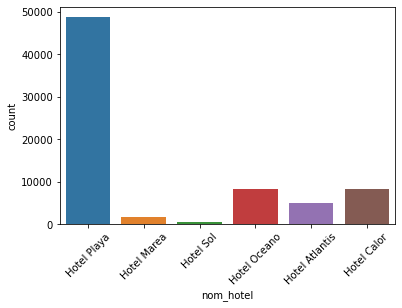

In [89]:
# Nombre de reserves per hotel
ax = sns.countplot(x='nom_hotel' ,data=data)
ax.tick_params(axis='x', rotation=45)

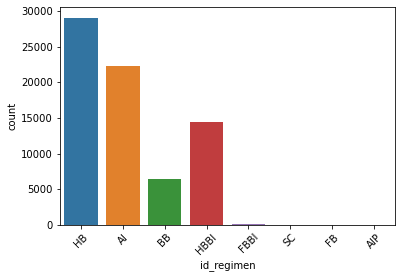

In [137]:
# Tipus de pensió per reserva
ax = sns.countplot(x='id_regimen' ,data=data)
ax.tick_params(axis='x', rotation=45)

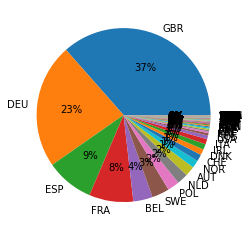

In [120]:
# Nacionalitat per reserva
labels = data.id_pais.value_counts().index

plt.pie(data.id_pais.value_counts(),labels=labels, autopct='%.0f%%')
plt.show()

(5.0, 500.0)

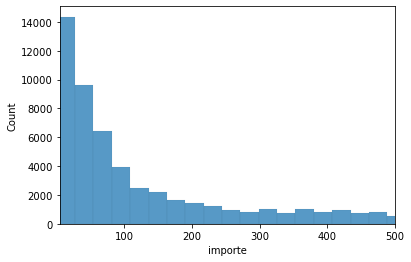

In [138]:
# Histograma amb l'import de les reserves
ax = sns.histplot(data.importe)
ax.set_xlim(5,500)